In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 683.7+ KB


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.4+ MB


In [5]:
plt.scatter(test_data.Rooms, test_data.Square)

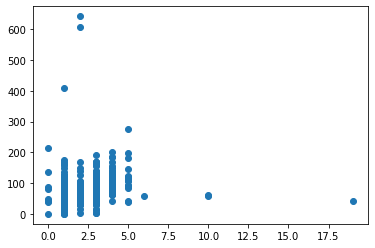

In [6]:
plt.scatter(train_data.Rooms, train_data.Square)

In [7]:
plt.scatter(train_data.Rooms, train_data.Price)

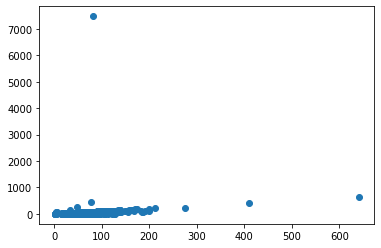

In [8]:
plt.scatter(train_data.Square, train_data.LifeSquare)

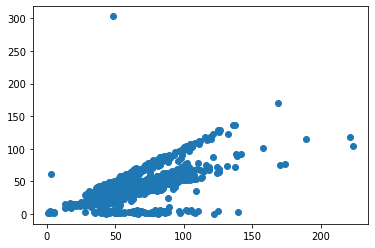

In [9]:
plt.scatter(test_data.Square, test_data.LifeSquare)

In [10]:
# # Убираем все экстримальные значения

# # Функции для очистки и подготовки данных
# mean_year = np.round(train_data.loc[train_data['HouseYear'] <= 2020, 'HouseYear'].mean())
# mean_healthcare = np.round(train_data["Healthcare_1"].mean())
# mean_square_for_max = train_data.loc[(train_data['Rooms'] <= 
#                                       train_data.loc[(train_data['Square'] > 300), 'Rooms'].mean()), 'Square'].mean()
# # соотношение жил площади к площади
# LifeSquare_SUM=train_data.loc[ 
#                (train_data['LifeSquare'] > 10) &
#                (train_data['LifeSquare'] < 200),'LifeSquare'].sum()
# koef_S_LS=train_data.Square.sum()/LifeSquare_SUM

# mean_square_for_big_ls = train_data.loc[train_data['LifeSquare'] > 200, 'Square'].mean()
# # mean_life_squae_for_max = train_data.loc[train_data['Square'] >= mean_square_for_big_ls, 'LifeSquare'].mean()

In [11]:
# Функции для очистки и подготовки данных
mean_year = np.round(train_data.loc[train_data['HouseYear'] <= 2020, 'HouseYear'].mean())
mean_healthcare = np.round(train_data["Healthcare_1"].mean())
mean_square_for_max = train_data.loc[(train_data['Rooms'] <= train_data.loc[(train_data['Square'] > 300), 'Rooms'].mean()), 'Square'].mean()
mean_square_for_big_ls = train_data.loc[train_data['LifeSquare'] > 250, 'Square'].mean()
mean_life_squae_for_max = train_data.loc[train_data['Square'] >= mean_square_for_big_ls, 'LifeSquare'].mean()

In [12]:
# # удаляем выбросы с помощью boxplot
# import seaborn as sns
# %matplotlib inline
# ls=train_data.LifeSquare
# sns.boxplot(ls)

In [13]:
def clean_year(df, mean_year):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = mean_year

In [14]:
def clean_life_square(df, koef_S_LS):
    df.loc[(df['LifeSquare'] < 10) | (df['LifeSquare'].isnull()), 'LifeSquare'] = df['Square']*0.85
    df.loc[df['LifeSquare'] > 250, 'LifeSquare'] = mean_life_squae_for_max

In [15]:
def clean_square(df, mean_square_for_max):
    df.loc[(df['Square'] > 300), 'Square'] = mean_square_for_max

In [16]:
def clean_healthcare_1(df, mean_healthcare):
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = mean_healthcare

In [17]:
def clean_rooms(df):
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] < 30), 'Rooms'] = 1
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 30) & (df['LifeSquare'] < 45), 'Rooms'] = 2
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 45) & (df['LifeSquare'] < 60), 'Rooms'] = 3
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 60) & (df['LifeSquare'] < 75), 'Rooms'] = 4
    df.loc[(df['Rooms'] < 1) & (df['LifeSquare'] > 70), 'Rooms'] = 6
    df.loc[(df['Rooms'] > 10), 'Rooms'] = 2

In [18]:
def prepare_data(df, mean_year=mean_year, mean_healthcare=mean_healthcare, mean_square_for_max=mean_square_for_max, mean_life_squae_for_max=mean_life_squae_for_max):
    clean_year(df, mean_year)
    clean_life_square(df, mean_life_squae_for_max)
    clean_healthcare_1(df, mean_healthcare)
    clean_rooms(df)
    clean_square(df, mean_square_for_max)

In [19]:
print(mean_year)
print(mean_healthcare)
print(mean_square_for_max)
print(mean_square_for_big_ls)
# print(koef_S_LS)

1985.0
1143.0
41.4101012544039
251.73879897754537


In [20]:
prepare_data(train_data)
prepare_data(test_data)

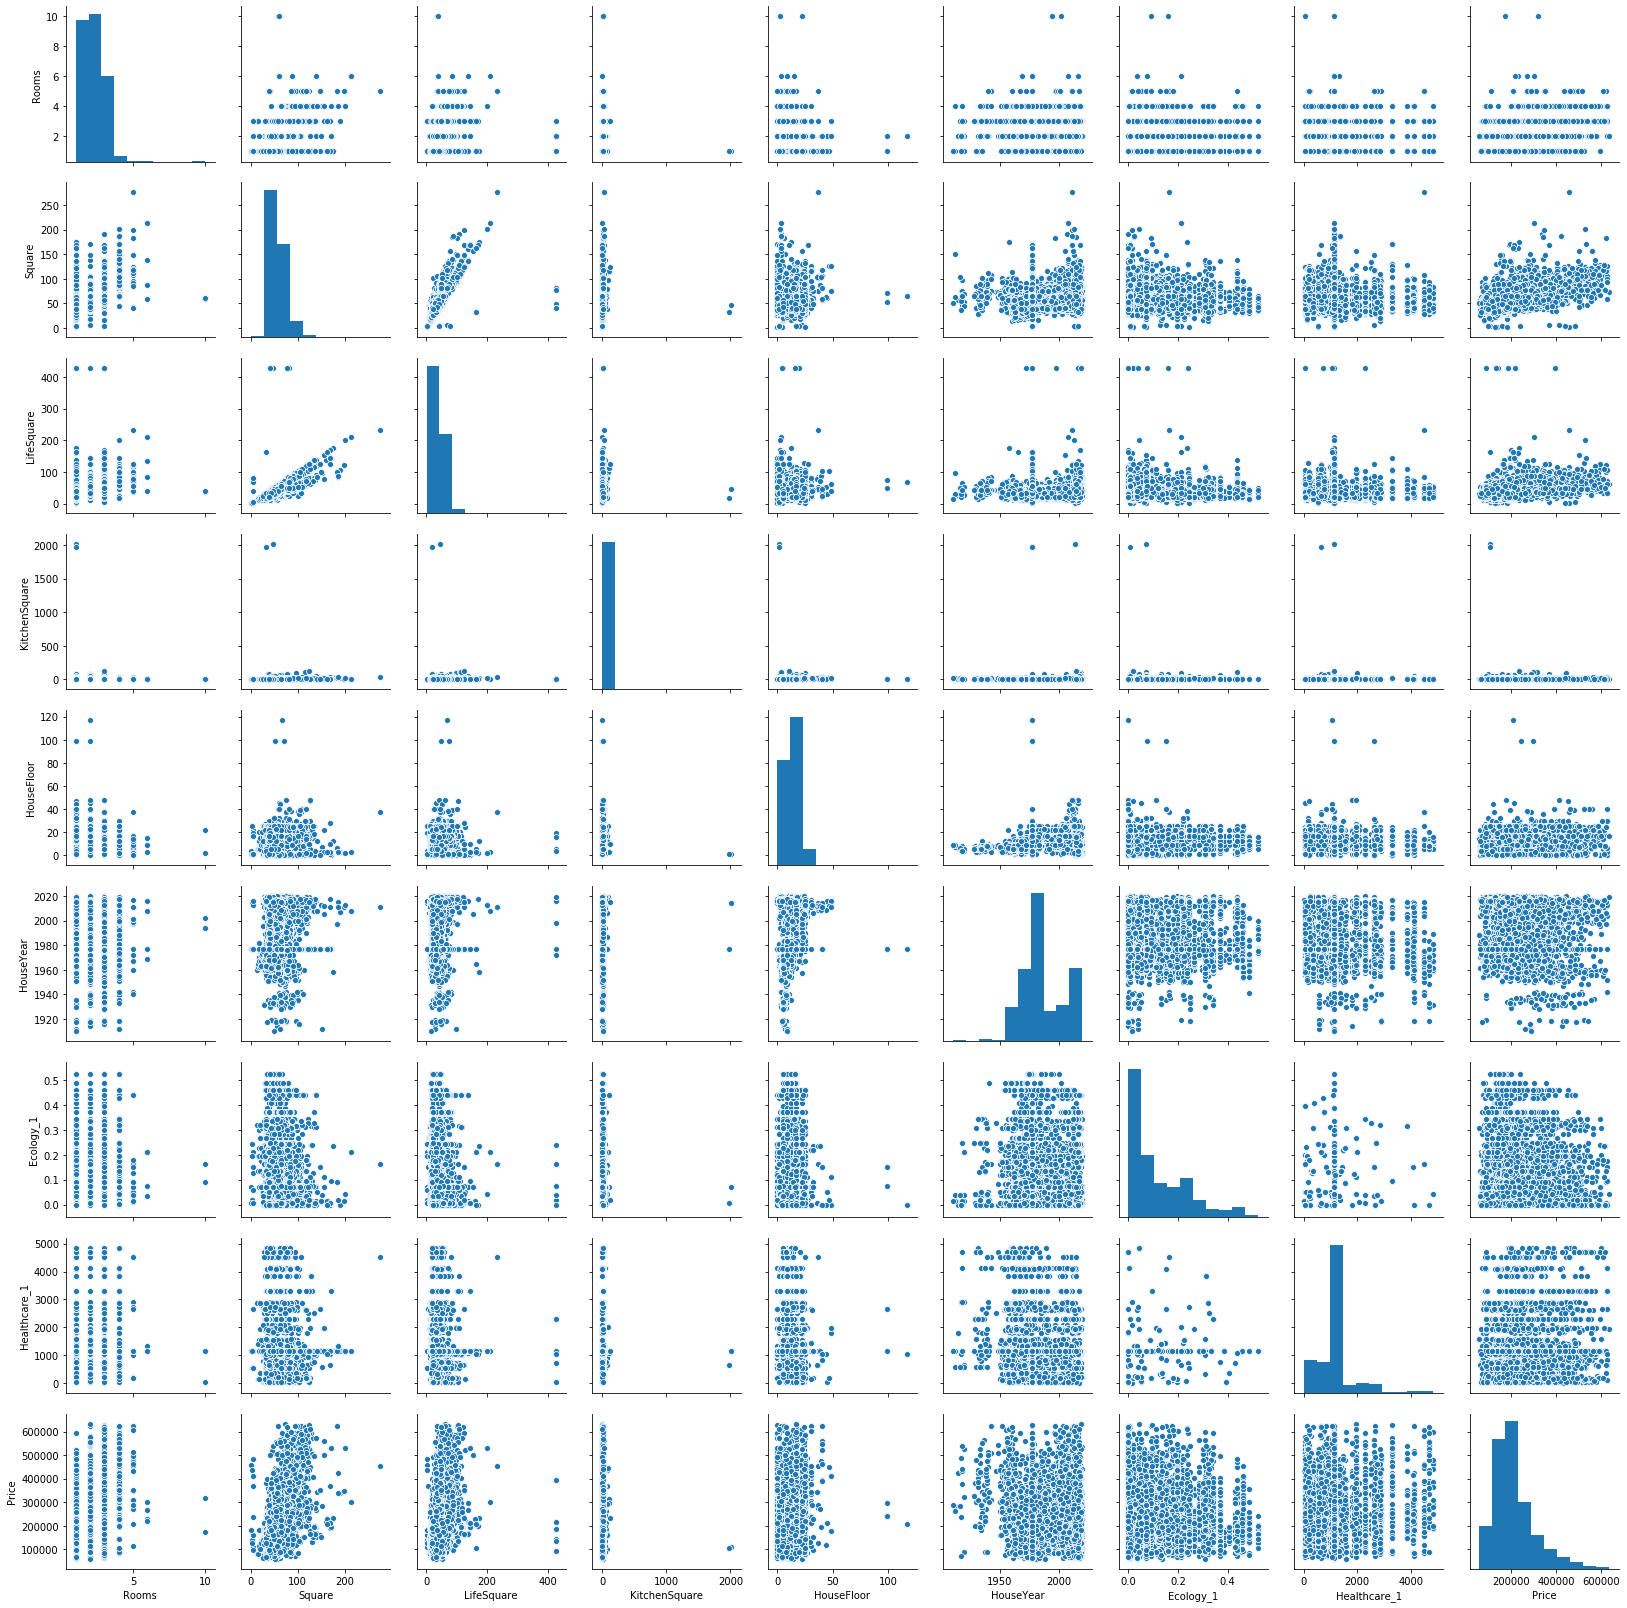

In [28]:
df_num_features = train_data.select_dtypes(include=['float64','uint8'])  # отбираем количественные признаки
import seaborn as sns
sns.pairplot(df_num_features);

In [21]:
# Убрать выброс двух квартир (лишний ноль)
# train_data.loc[train_data.Rooms==10,'Rooms']=1
# test_data.loc[train_data.Rooms==17,'Rooms']=1 # тут функции хорошо удаляют

In [22]:
# # соотношение жил площади к площади
# LifeSquare_SUM=train_data.loc[
#                (train_data['LifeSquare'] > 10) &
#                (train_data['LifeSquare'] < 200),'LifeSquare'].sum()
# koef_S_LS=train_data.Square.sum()/LifeSquare_SUM
# print(koef_S_LS)
# LifeSquare_SUM_t=test_data.loc[
#                (test_data['LifeSquare'] > 10) &
#                (test_data['LifeSquare'] < 200),'LifeSquare'].sum()
# koef_S_LS_test=test_data.Square.sum()/LifeSquare_SUM_t
# koef_S_LS_test

In [23]:
# (train_data['Square']/train_data['LifeSquare']).describe()

In [24]:
# train_data.loc[(train_data['Square']/train_data['LifeSquare'] < koef_S_LS/2) | 
#                (train_data['Square']/train_data['LifeSquare'] > koef_S_LS*3), 'LifeSquare'] = train_data.Square/koef_S_LS

In [25]:
# test_data.loc[(test_data['Square']/test_data['LifeSquare'] < koef_S_LS_test/2) | 
#                (test_data['Square']/test_data['LifeSquare'] > koef_S_LS_test*3), 'LifeSquare'] = test_data.Square/koef_S_LS_test

In [26]:
X = pd.get_dummies(train_data)
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtypes: float64(8), int64(7), uint8(6)
memory usage: 1.2 MB


In [27]:
y = train_data.Price
y.count()

10000

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
model = RandomForestRegressor(n_estimators=2600, max_depth=18, random_state=42, max_features=7, 
                              n_jobs=4)

In [30]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2600, n_jobs=4,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [31]:
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

In [32]:
# Предсказываем на valid и train данных и проверяем метрики
# Для train
r2_score(y_train, y_pred_train)

0.9571761635284779

In [33]:
# Для valid
r2_score(y_valid, y_pred)

0.7365623086906559

In [38]:
print(0.7409196020056066-0.7408383443306006)
print(0.74098820312323-0.7408383443306006)
print(0.7410369531391867-0.74098820312323)

8.125767500599679e-05
0.00014985879262940927
4.875001595672224e-05


0.7395022017238742 - test_size=0.27, max_features=6
0.7403280251584794 10 - минимальная жилая площадь
0.7408383443306006 - n_estimators=1500
0.74098820312323   - n_estimators=2000
0.7410369531391867 - n_estimators=2500
0.7410478387471598 - n_estimators=2600

0.7409196020056066 - n_estimators=1500 и criterion='mae'


0.7396502626673827 - после моей обработки!!! Хуже!!!
0.7388456750277941 - минимальная площадь 15 ХУЖЕ!

criterion='mae'
min_samples_split=2


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
 
 
# x_train = [
#     [1, 2], [5, 6],
#     [3, 4], [7, 8],
#     [-1, 2], [-5, 6],
#     [-3, 4], [-7, 8], [0, 0]
# ]
# y_train = [1, 1, 1, 1, 0, 0, 0, 0, 1]
 
# parameter_grid = {
#             'criterion': ['entropy', 'gini'],
#             'max_depth': [10, 20, 100],
#             'n_estimators': [10, 20, 100]
#         }
# clf = RandomForestClassifier()
# grid_searcher = GridSearchCV(clf, parameter_grid, verbose=2)
# grid_searcher.fit(x_train, y_train)
# clf_best = grid_searcher.best_estimator_
 
# print('Best params = ', clf_best.get_params())

In [ ]:
# importances = model.feature_importances_
# # Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]
# # Rearrange feature names so they match the sorted feature importances
# names = [X_train.columns[i] for i in indices]
# # Create plot
# plt.figure()
# # Create plot title
# plt.title("Feature Importance")
# # Add bars
# plt.bar(range(X.shape[1]), importances[indices])
# # Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)

# # plt.barh(x_train.columns, model.feature_importances_)

# plt.show

In [ ]:
# X_train.describe()

In [34]:
# Предсказываем цены для тестовых данных и выгружаем в файл
X_test = pd.get_dummies(test_data)
X_test.drop("Id", axis=1, inplace=True)
test_data["Price"] = model.predict(X_test)

In [35]:
# экспорт в файл
test_data.loc[:, ['Id', 'Price']].to_csv('kaggle_example_12.csv', index=False)

In [2]:
# сохранить обработанные данные в csv
# print(df.to_csv(sep='\t', index=False))
kaggle.to_csv('kaggle_01.csv', index=False)

NameError: name 'kaggle' is not defined

In [3]:
# переобучение и оценка модели
from sklearn.ensemble import GradientBoostingRegressor
final_model = GradientBoostingRegressor(n_estimators=100, max_depth=7, random_state=42)
final_model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
import seaborn as sns
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10)) 
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [ ]:
y_train_preds = final_model.predict(x_train)
evaluate_preds(y_train, y_train_preds)